In [37]:
#@title imports
from tensorboardX import SummaryWriter
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
import functools
import matplotlib.pyplot as plt
import numpy as np
import time
import torch

## Get the data

In [2]:
#@title func: get_dataloader
def get_dataloader(dataset, batch_size: int = 16, shuffle: bool = True) -> DataLoader:
  return DataLoader(
      dataset=dataset,
      batch_size=batch_size,
      shuffle=shuffle
  )

In [3]:
#@title Load the datasets and create dataloaders
batch_size = 32  #@param
shuffle = True  #@param
download = True  #@param

image_transforms = transforms.Compose([
  transforms.Pad(padding=2, fill=0, padding_mode="constant"),
  transforms.ToTensor(),
  transforms.Normalize((0.5), (.5)),
])

dataset_train = MNIST(root="data/MNIST/train", train=True, download=download, transform=image_transforms)
dataset_test = MNIST(root="data/MNIST/test", train=False, download=download, transform=image_transforms)

dataloader_train = get_dataloader(dataset_train, batch_size=batch_size, shuffle=shuffle)
dataloader_test = get_dataloader(dataset_test, batch_size=batch_size, shuffle=shuffle, )

print(f"Train samples: {len(dataset_train)} ; {len(dataloader_train)} batches")
print(f"Test samples: {len(dataset_test)} ; {len(dataloader_test)} batches")

Train samples: 60000 ; 1875 batches
Test samples: 10000 ; 313 batches


In [4]:
print(dataset_train[0][0].mean(), dataset_train[0][0].std())
print(dataset_train[1][0].min(), dataset_train[1][0].max())

tensor(-0.7892) tensor(0.5592)
tensor(-1.) tensor(1.)


In [5]:
def visualize_mnist_batch(
        images,
        labels,
        predictions=None,
        num_images=32,
        figsize=(8, 8),
        denormalize=True,
        extra_label=None
) -> None:
    """
    Visualize a batch of MNIST images with their labels and optionally predictions.
    
    Args:
        dataloader: PyTorch dataloader containing MNIST images
        predictions: Optional predictions from a model
        num_images: Number of images to display (default: 32)
        figsize: Figure size (default: (8, 8)) - smaller than before
        denormalize: Whether to denormalize images (default: True)
        extra_label: Optional function that takes an image and returns a label string
    """
    # Limit to num_images
    images = images[:num_images]
    labels = labels[:num_images]

    # Denormalize images if needed
    if denormalize:
        images = images * 0.5 + 0.5
    
    # Create a grid of images
    nrow = int(np.sqrt(num_images))
    grid = make_grid(images, nrow=nrow, padding=1)  # Reduced padding
    grid = grid.permute(1, 2, 0)  # Change from CxHxW to HxWxC for plotting
    
    # Plot images
    plt.figure(figsize=figsize)  # Smaller figure size
    plt.imshow(grid.squeeze(), cmap='gray')
    plt.axis('off')
    
    # Add labels (and predictions if available)
    _ = plt.gca()
    w, h = grid.shape[:2]
    ncol = int(np.ceil(num_images / nrow))
    
    # Calculate cell size
    cell_h, cell_w = h / nrow, w / ncol
    
    # Add text with labels and predictions
    for i in range(num_images):
        row, col = i // nrow, i % nrow
        y, x = row * cell_h + cell_h * 0.05, col * cell_w + cell_w * 0.05  # Position closer to top-left
        
        # Start with true label
        label_text = f"Target: {labels[i]}"
        
        # Add prediction if available
        if predictions is not None:
            label_text += f" P: {predictions[i]}"
            # Add color based on correctness
            color = 'green' if predictions[i] == labels[i] else 'red'
        else:
            color = 'black'
        
        # Add extra label if provided
        if extra_label is not None:
            extra = extra_label(images[i])
            label_text += f"\n{extra}"
        
        # Use smaller font and more transparent background for cleaner look
        plt.text(x, y, label_text, color=color, fontsize=8, 
                 bbox=dict(facecolor='white', alpha=0.6))
    
    plt.tight_layout()
    plt.show()

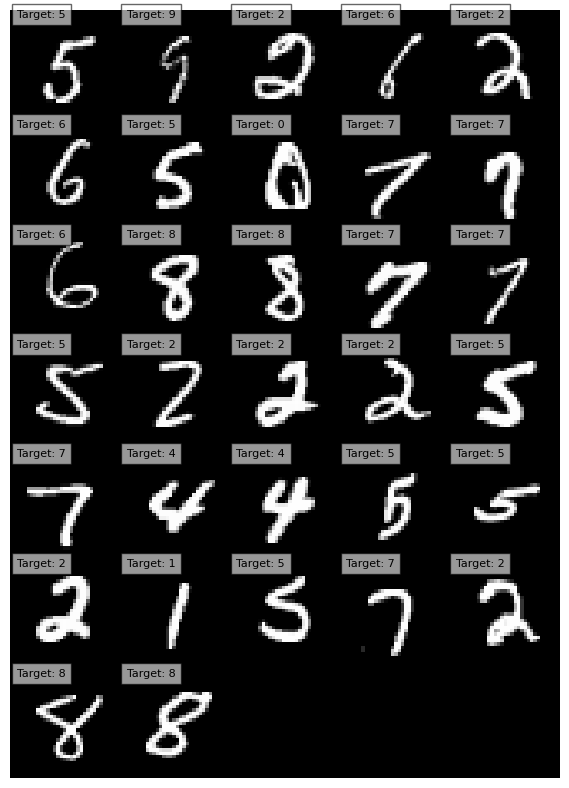

In [6]:
images, labels = next(iter(dataloader_test))
visualize_mnist_batch(images, labels)

In [9]:
from toylib import nn

import dataclasses
import jax

In [ ]:
@jax.tree_util.register_pytree_node_class
@dataclasses.dataclass
class Conv2D:
    """
    A simple Conv2D layer with weight and bias parameters.
    """
    key: jax.random.PRNGKey

    kernel_size: list[int]
    in_channels: int
    out_channels: int
    stride: list[int] = [1, 1]
    padding: str = 'VALID'
    bias: bool = True

    def __post_init__(self):
        keys = jax.random.split(self.key, 2)
        self.kernel = jax.random.uniform(
            keys[0],
            (self.out_channels, self.in_channels, *self.kernel_size),
            minval=-lim, maxval=lim
        )
        self.bias = (
            jax.random.uniform(b_key, (out_features,), minval=-lim, maxval=lim)
            if use_bias
            else None
        )


    def __call__(self, x):
        # Perform convolution operation here
        pass

In [12]:
a = np.ones((1, 6, 6, 1), dtype=np.float32)
k = np.ones((3, 3, 1, 1))
k[0, :] = 0
k[-1, :] = 0
k[:, 0] = 0
k[:, -1] = 0
strides = (1, 1)
padding = "SAME"
output = jax.lax.conv_general_dilated(a, k, strides, padding, dimension_numbers=("NHWC", "HWIO", "NHWC"))
output.shape

(1, 6, 6, 1)